In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurements.date)).scalar()
most_recent_date

'2017-08-23'

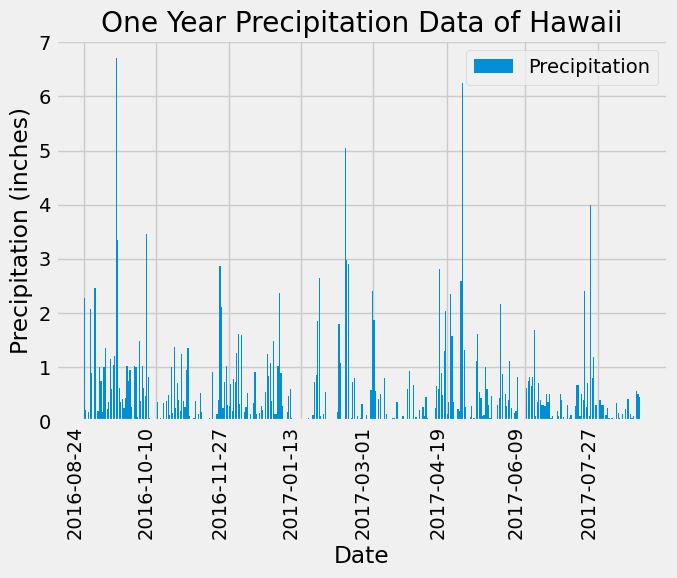

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.
year_from_most_recent = most_recent_date - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
data = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= year_from_most_recent).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(data, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(7, 6))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation', linewidth = 10000)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('One Year Precipitation Data of Hawaii')
plt.xticks(precipitation_df['Date'][::300], rotation=90, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats_precipitation = precipitation_df['Precipitation'].describe()
summary_stats_precipitation

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(stations.station)).scalar()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurements.station, func.count(measurements.station)).\
                        group_by(measurements.station).\
                        order_by(func.count(measurements.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
most_active_temp_stats = session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).\
                    filter(measurements.station == most_active_station).all()
most_active_temp_stats

[(54.0, 85.0, 71.66378066378067)]

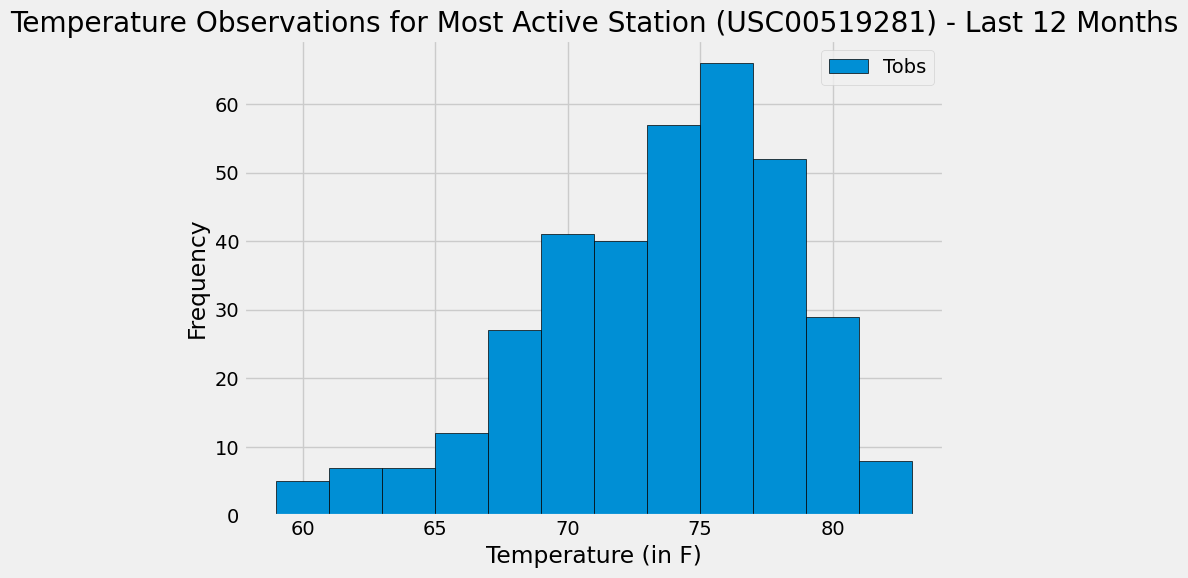

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in the dataset
most_recent_date = dt.datetime(2017, 8, 23)
year_from_most_recent = most_recent_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(measurements.date, measurements.tobs).\
                   filter(measurements.station == most_active_station).\
                   filter(measurements.date >= year_from_most_recent).all()

# Save the query results as a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, label='Tobs', edgecolor='black')
plt.xlabel('Temperature (in F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Most Active Station ({most_active_station}) - Last 12 Months')
plt.legend()
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()